<a href="https://colab.research.google.com/github/Snowyyxx/Pytorch/blob/main/Keras_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import torch.optim as optim
import seaborn as sns
from torch import nn
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving Titanic-Dataset.csv to Titanic-Dataset.csv
User uploaded file "Titanic-Dataset.csv" with length 61194 bytes


In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
from sklearn.preprocessing import LabelEncoder
embarked_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
df['Sex'] = sex_encoder.fit_transform(df['Sex'])
df['Embarked'] = embarked_encoder.fit_transform(df['Embarked']) # S->2, C->0,Q->1

In [ ]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,1


<ipython-input-28-ba388f4ecb4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

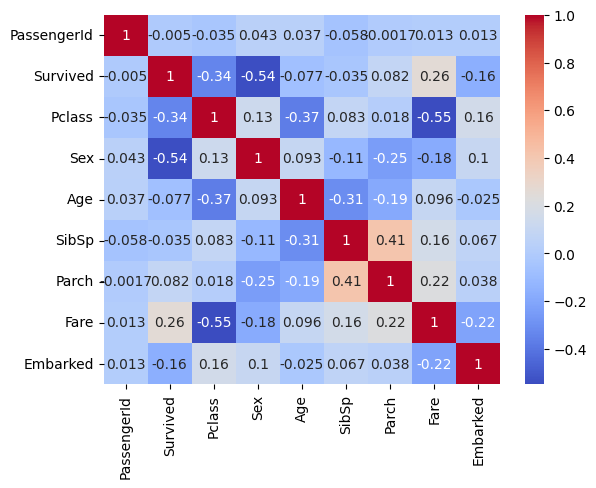

In [ ]:
# Creating HeatMap:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [ ]:
def PrepareData(df):
  df.drop(columns=['PassengerId','Name','Ticket','Cabin','Parch'],inplace=True)
  age_mean = df['Age'].mean()
  df['Age'].fillna(age_mean,inplace=True)
  fare_mean = df['Fare'].mean()
  df['Fare'].fillna(fare_mean,inplace=True)
  X = df.drop(columns=['Survived'])
  y = df['Survived']
  X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test=PrepareData(df)

In [ ]:
class MultilayerPerceptron(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(MultilayerPerceptron,self).__init__()
    self.fc1 = nn.Linear(input_size,hidden_size) # First hidden layer
    self.fc2 = nn.Linear(hidden_size,num_classes) # Output Layer
    self.relu = nn.ReLU() #Activation

  def forward(self,x):

    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out


In [ ]:
input_size = X_train.shape[1]
hidden_size = 500
num_classes =2

model = MultilayerPerceptron(input_size,hidden_size,num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)


In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)  # or torch.long if y_train contains integer labels
y_train_tensor = y_train_tensor.long() # contains integers class labels


epochs = 10;
for epoch in range(epochs):
  y_pred = model(X_train_tensor)
  loss = criterion(y_pred,y_train_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In [ ]:
X_test_tensor = torch.tensor(X_test.values,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values,dtype=torch.float32)
y_test_tensor = y_test_tensor.long()

In [ ]:
test_dataset = torch.TensorDataset(X_test_tensor,y_test_tensor)
test_loader = torch.DataLoader(test_dataset,batch_size =64,shuffle=False)

with torch.no_grad():
    all_predictions = []
    for inputs, _ in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())



AttributeError: ignored